In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

url='https://www.espncricinfo.com/records/most-player-of-the-series-awards-283469'

response=requests.get(url)
soup=BeautifulSoup(response.text,'html.parser')


table= soup.find('table')

data=pd.read_html(str(table))

df=data[0]

data[0].to_csv('Most-POTS.csv')

df

<ipython-input-57-4a903c7b0812>:17: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data=pd.read_html(str(table))


,Player,Span,Mat,Series,Awards
0,R Ashwin (IND),2011-2024,102,42,11
1,M Muralidaran (ICC/SL),1992-2010,133,61,11
2,JH Kallis (ICC/SA),1995-2013,166,61,9
3,Imran Khan (PAK),1971-1992,88,28,8
4,Sir RJ Hadlee (NZ),1973-1990,86,33,8
...,...,...,...,...,...
64,I Sharma (IND),2007-2021,105,47,3
65,HM Amla (SA),2004-2019,124,48,3
66,Inzamam-ul-Haq (ICC/PAK),1992-2007,120,52,3
67,DL Vettori (ICC/NZ),1997-2014,113,52,3


Top five playes according to POTS awards are

In [ ]:
#Top 5 players according to POTS
top_players=data[0].head()
top_players

,Player,Span,Mat,Series,Awards,Country
0,R Ashwin,2011-2024,102,42,11,IND
1,M Muralidaran,1992-2010,133,61,11,SL
2,JH Kallis,1995-2013,166,61,9,SA
3,Imran Khan,1971-1992,88,28,8,PAK
4,Sir RJ Hadlee,1973-1990,86,33,8,NZ


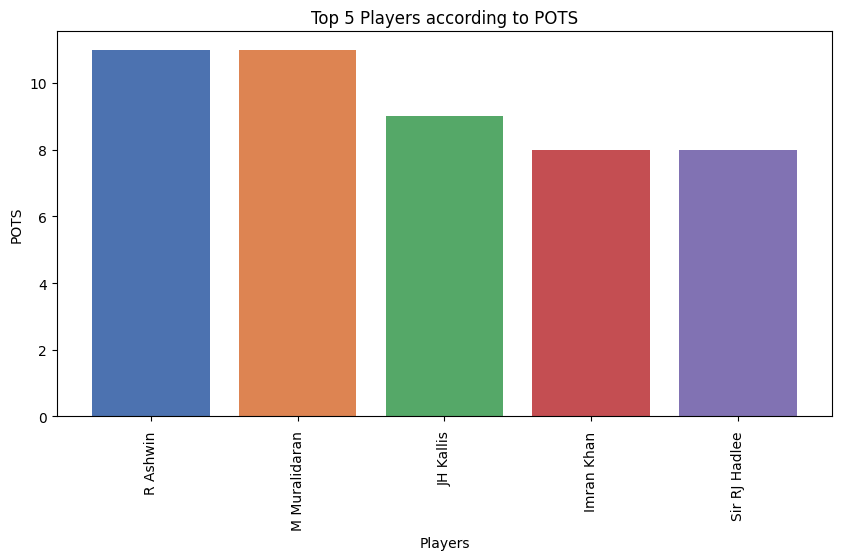

In [ ]:
# print(top_players[['Player','Awards']])
plt.figure(figsize=(10,5))
colors_scheme = sns.color_palette("deep", len(top_players['Player'].unique()))
plt.bar(top_players['Player'],top_players['Awards'],color=colors_scheme)
# plt.hist(top_players[['Player','Awards']],bins=5)
plt.xticks(rotation=90 )
plt.xlabel('Players')
plt.ylabel('POTS')
plt.title('Top 5 Players according to POTS')
plt.show()

**R Ashwin and M Muralidaran** each have **11** POTS, the most any player has ever received.

In [ ]:
# PLayers From Pakistan and India
df['Player']=df['Player'].astype(str)
df['Country']=df['Player'].apply(lambda x:x.split('(')[1].replace(')',''))
df['Country']=df['Country'].apply(lambda x:x.replace('ICC/',''))
df['Country']=df['Country'].apply(lambda x:x.replace('/ICC',''))
df['Player']=df['Player'].apply(lambda x:x.split('(')[0])
pak_ind_players=df[df['Country'].isin(['IND','PAK'])]
pak_ind_players.style.background_gradient(cmap='Blues')

,Player,Span,Mat,Series,Awards,Country
0,R Ashwin,2011-2024,102,42,11,IND
3,Imran Khan,1971-1992,88,28,8,PAK
6,Wasim Akram,1985-2002,104,43,7,PAK
12,Yasir Shah,2014-2022,48,24,5,PAK
16,Waqar Younis,1989-2003,87,38,5,PAK
18,V Sehwag,2001-2013,104,39,5,IND
24,SR Tendulkar,1989-2013,200,74,5,IND
32,N Kapil Dev,1978-1994,131,38,4,IND
39,Harbhajan Singh,1998-2015,103,47,4,IND
41,Younis Khan,2000-2017,118,49,4,PAK


In [ ]:
pak_ind_players['Country'].value_counts()

,count
Country,
IND,12
PAK,8


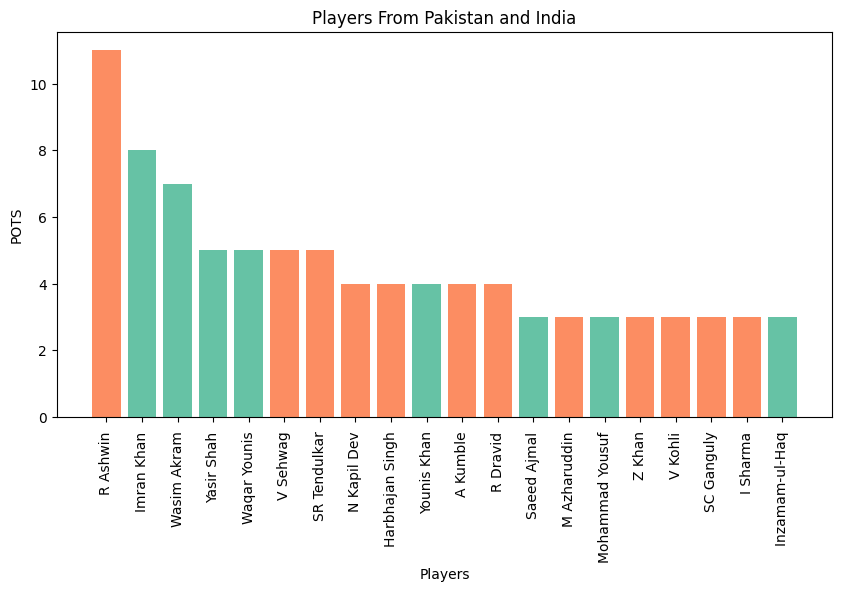

In [ ]:
plt.figure(figsize=(10,5))
colors_scheme = sns.color_palette("Set2", 2)
# colors=['green' if n=='PAK' else 'red' for n in pak_ind_players['Country']]
colors=[colors_scheme[0] if n=='PAK' else colors_scheme[1] for n in pak_ind_players['Country']]
plt.bar(pak_ind_players['Player'],pak_ind_players['Awards'],color=colors)
# plt.hist(top_players[['Player','Awards']],bins=5
plt.xticks(rotation=90 )
plt.xlabel('Players')
plt.ylabel('POTS')
plt.title('Players From Pakistan and India')
plt.show()

The countries with players in top 10 are

In [ ]:
top_10=df.nlargest(10,'Awards')
top_10

,Player,Span,Mat,Series,Awards,Country
0,R Ashwin,2011-2024,102,42,11,IND
1,M Muralidaran,1992-2010,133,61,11,SL
2,JH Kallis,1995-2013,166,61,9,SA
3,Imran Khan,1971-1992,88,28,8,PAK
4,Sir RJ Hadlee,1973-1990,86,33,8,NZ
5,SK Warne,1992-2007,145,46,8,AUS
6,Wasim Akram,1985-2002,104,43,7,PAK
7,S Chanderpaul,1994-2015,164,60,7,WI
8,MD Marshall,1978-1991,81,21,6,WI
9,CEL Ambrose,1988-2000,98,27,6,WI


In [ ]:
top_10['Country'].value_counts()

,count
Country,
WI,3
PAK,2
IND,1
SL,1
SA,1
NZ,1
AUS,1


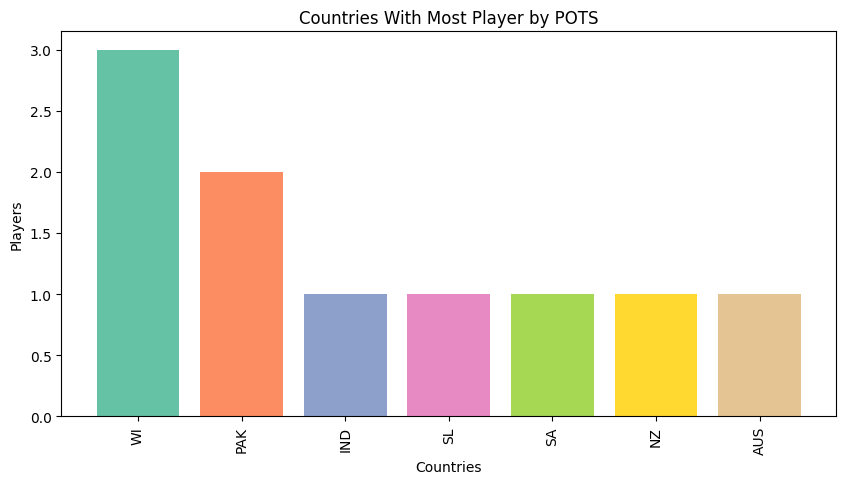

In [ ]:
plt.figure(figsize=(10,5))
colors_scheme = sns.color_palette("Set2", len(top_10['Country'].unique()))
plt.bar(top_10['Country'].value_counts().index,top_10['Country'].value_counts(),color=colors_scheme)
plt.xticks(rotation=90 )
plt.xlabel('Countries')
plt.ylabel('Players')
plt.title('Countries With Most Player by POTS')
plt.show()

WI leads the chart with three players in top 10

In [ ]:
top_20=df.sort_values(by='Awards').head(20)
top_20

,Player,Span,Mat,Series,Awards,Country
68,DPMD Jayawardene,1997-2014,149,60,3,SL
48,GF Lawson,1980-1989,46,15,3,AUS
49,Saeed Ajmal,2009-2014,35,16,3,PAK
50,MA Butcher,1997-2004,71,20,3,ENG
52,VD Philander,2011-2020,64,29,3,SA
53,AC Gilchrist,1999-2008,96,30,3,AUS
54,IT Botham,1977-1992,102,32,3,ENG
55,DI Gower,1978-1992,117,32,3,ENG
56,RR Sarwan,2000-2011,87,32,3,WI
57,M Azharuddin,1984-2000,99,37,3,IND


In [ ]:
top_20.groupby('Country')['Awards'].count().sort_values(ascending=False)

,Awards
Country,
ENG,4
IND,4
AUS,3
PAK,3
SA,2
WI,2
NZ,1
SL,1


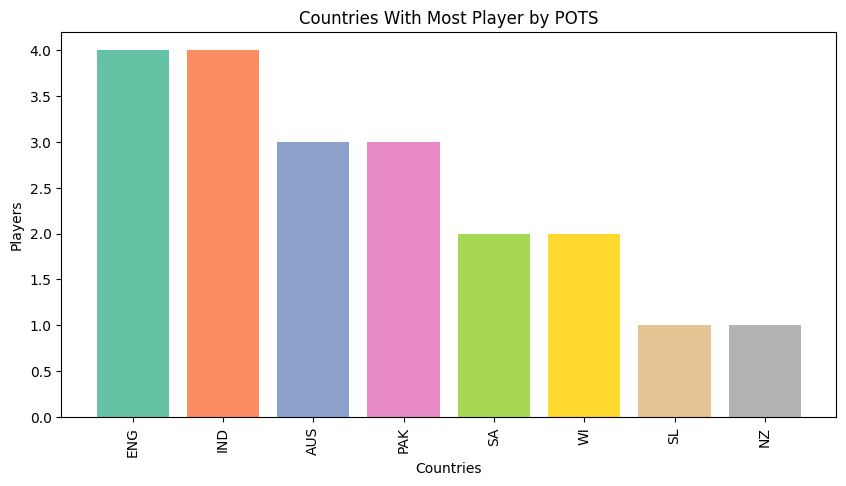

In [ ]:
plt.figure(figsize=(10,5))
colors_scheme = sns.color_palette("Set2", len(top_20['Country'].unique()))
plt.bar(top_20['Country'].value_counts().index,top_20['Country'].value_counts(),color=colors_scheme)
plt.xticks(rotation=90 )
plt.xlabel('Countries')
plt.ylabel('Players')
plt.title('Countries With Most Player by POTS')
plt.show()

England along with India has the most number of players in top 20 players by POTS

In [ ]:
top_30=df.nlargest(30,'Awards')
top_30

,Player,Span,Mat,Series,Awards,Country
0,R Ashwin,2011-2024,102,42,11,IND
1,M Muralidaran,1992-2010,133,61,11,SL
2,JH Kallis,1995-2013,166,61,9,SA
3,Imran Khan,1971-1992,88,28,8,PAK
4,Sir RJ Hadlee,1973-1990,86,33,8,NZ
5,SK Warne,1992-2007,145,46,8,AUS
6,Wasim Akram,1985-2002,104,43,7,PAK
7,S Chanderpaul,1994-2015,164,60,7,WI
8,MD Marshall,1978-1991,81,21,6,WI
9,CEL Ambrose,1988-2000,98,27,6,WI


In [ ]:
top_30['Country'].value_counts()

,count
Country,
AUS,6
ENG,6
PAK,4
IND,3
SA,3
WI,3
SL,2
NZ,1
BAN,1


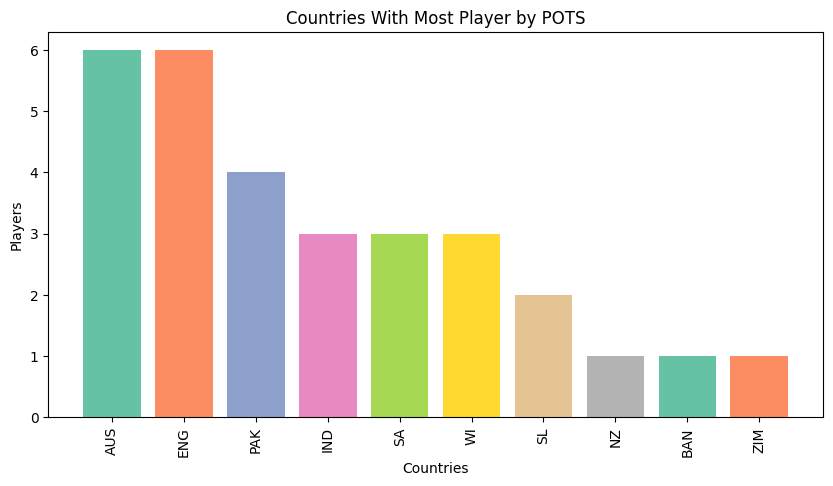

In [ ]:
plt.figure(figsize=(10,5))
colors_scheme = sns.color_palette("Set2", len(top_30['Country'].unique()))
plt.bar(top_30['Country'].value_counts().index,top_30['Country'].value_counts(),color=colors_scheme)
plt.xticks(rotation=90 )
plt.xlabel('Countries')
plt.ylabel('Players')
plt.title('Countries With Most Player by POTS')
plt.show()

There is a tie between Australia and England as both have 6 players in top 30 players by POTS awards